In [1]:
import os
import sys
sys.path.insert(0, os.path.abspath('../'))
from service.Classifier.DataLoader.DataLoader import DataLoader
from service.Classifier.Enums.priority import Priority
from service.Classifier.DataLoader.P2DataLoader import P2DataLoader
from service.Classifier.DataLoader.P3DataLoader import P3DataLoader
from service.Classifier.DataLoader.P4DataLoader import P4DataLoader
from service.Classifier.Model.XGBRegressionModel import XGBRegressionModel
from service.Classifier.PreProcessing.RegressionModelPreProcessor import RegressionModelPreProcessor
from service.Classifier.DataSplit.TrainTestSplit import TrainTestSplit
from service.Classifier.Enums.dataTypeEnum import DataType

/Users/fjirigesi/Documents/OOSLAClassifier/service/Classifier/Model/XGBRegressionModel.py:2: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  from pandas import np


In [2]:
def initializeByPriority(priority):
    # load new updated data via Features class
    if priority == Priority.P2.value:
        return P2DataLoader()
    elif priority == Priority.P3.value:
        return P3DataLoader()
    elif priority == Priority.P4.value:
        return P4DataLoader()
    return None

In [3]:
priority = Priority.P2.value
def extract_data(priority):
    dataLoader = initializeByPriority(priority)
    data_df = dataLoader.loadTrainingRawData()
    # split data into train test 4:1
    dataSplit = TrainTestSplit()
    train_df, test_df = dataSplit.split(data_df)

    # generate features
    train_df, feature_names = dataLoader.transformRawDataToFeatures(train_df, DataType.TRAINDATA.value)
    test_df, feature_names = dataLoader.transformRawDataToFeatures(test_df, DataType.VALIDATION.value)
    # pre-processing the data based on model type
    preprocessor = RegressionModelPreProcessor(feature_names)
    train_X, train_y, test_X, test_y = preprocessor.preprocessing(train_df, test_df)
    
    return (train_X, train_y, test_X, test_y, train_df, test_df)

In [4]:
import xgboost as xgb
import numpy as np
import pandas as pd
from service.Classifier.Enums.LabelEnum import LabelEnum
from sklearn.metrics import mean_squared_error, mean_absolute_error, confusion_matrix, classification_report
from service.Classifier.PreProcessing.Utils.dataValidator import DataValidator

def evaluate_result(train_X, train_y, test_X, test_y, train_df, test_df):

    model = xgb.XGBRegressor(max_depth=5, n_estimators=100, learning_rate=0.05).fit(train_X, train_y)
    predictions = np.rint(model.predict(test_X)).astype(np.int64)
    submission = pd.DataFrame({'ID': test_df['keyID'],
                               LabelEnum.CLOSEDDAY.value: predictions, 'Actual': test_y})
    rmse = np.sqrt(mean_squared_error(predictions, test_df[LabelEnum.CLOSEDDAY.value]))
    print("RMSE: %f" % rmse)
    mae = mean_absolute_error(predictions, test_y)
    print("MAE: %f" % mae)
    DataValidator().valid(submission, priority, test_df)
    print(confusion_matrix(submission["truth"], submission["prediction"]))
    print(classification_report(submission["truth"], submission["prediction"]))
    
    return (test_y, predictions, submission["truth"], submission["prediction"], model)

In [5]:
priority = Priority.P2.value

train_X_P2, train_y_P2, test_X_P2, test_y_P2, train_df_P2, test_df_P2 = extract_data(priority)

p2_regression_true, p2_regression_pred, p2_classification_true, p2_classification_pred, p2_model = evaluate_result(train_X_P2, train_y_P2, test_X_P2, test_y_P2, train_df_P2, test_df_P2)

/Users/fjirigesi/anaconda3/lib/python3.8/site-packages/pymongo/common.py:781: UserWarning: The value of ssl must be 'true' or 'false'
  warnings.warn(str(exc))


The project is not in embedding: NATBEMCR
The project is not in embedding: GGRIP
The project is not in embedding: PROBLEM
The project is not in embedding: PX
The project is not in embedding: CSCNPLAT
RMSE: 9.166492
MAE: 7.109063
[[218 147]
 [ 90 196]]
              precision    recall  f1-score   support

       False       0.71      0.60      0.65       365
        True       0.57      0.69      0.62       286

    accuracy                           0.64       651
   macro avg       0.64      0.64      0.64       651
weighted avg       0.65      0.64      0.64       651



In [8]:
feature_names = train_df_P2.columns[2:10]
print(len(feature_names))
feature_names

8


Index(['chainLength', 'longTimeHold', 'lateTriageDays', 'InitialActivityCount',
       'InitialActionCount', 'recentActionCount', 'recentActivityCount',
       'projectCoverage'],
      dtype='object')

Text(0.5, 0, 'Permutation Importance on P2')

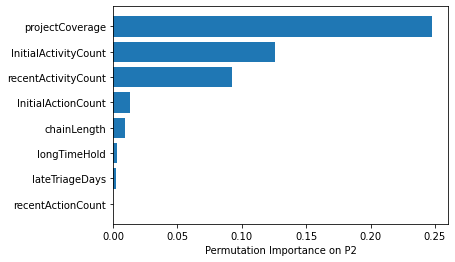

In [9]:
from matplotlib import pyplot as plt
# sorted_idx = p2_model.feature_importances_.argsort()
# plt.barh(feature_names[sorted_idx], p2_model.feature_importances_[sorted_idx])
# plt.xlabel("Xgboost buildin Feature Importance on P2")

from sklearn.inspection import permutation_importance
perm_importance = permutation_importance(p2_model, test_X_P2, test_y_P2)

sorted_idx = perm_importance.importances_mean.argsort()
plt.barh(feature_names[sorted_idx], perm_importance.importances_mean[sorted_idx])
plt.xlabel("Permutation Importance on P2")

perm_importance.importances_mean[sorted_idx]

In [11]:
perm_importance.importances_mean[sorted_idx]

array([0.0002491 , 0.00220964, 0.00290233, 0.00904674, 0.01325322,
       0.09233607, 0.12576389, 0.24770984])

## P3

In [12]:
priority = Priority.P3.value

train_X_P3, train_y_P3, test_X_P3, test_y_P3, train_df_P3, test_df_P3 = extract_data(priority)

p3_regression_true, p3_regression_pred, p3_classification_true, p3_classification_pred, p3_model = evaluate_result(train_X_P3, train_y_P3, test_X_P3, test_y_P3, train_df_P3, test_df_P3)

The project is not in embedding: PROBLEM
The project is not in embedding: RISKVRTB
The project is not in embedding: MPPMO
The project is not in embedding: WEBRES
The project is not in embedding: NRP
The project is not in embedding: WARROOM
RMSE: 18.738484
MAE: 13.240135
[[547 114]
 [122 104]]
              precision    recall  f1-score   support

       False       0.82      0.83      0.82       661
        True       0.48      0.46      0.47       226

    accuracy                           0.73       887
   macro avg       0.65      0.64      0.65       887
weighted avg       0.73      0.73      0.73       887



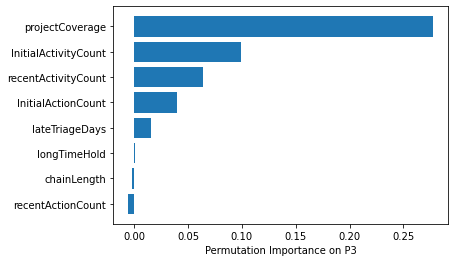

In [19]:
from matplotlib import pyplot as plt
# sorted_idx = p2_model.feature_importances_.argsort()
# plt.barh(feature_names[sorted_idx], p2_model.feature_importances_[sorted_idx])
# plt.xlabel("Xgboost buildin Feature Importance on P2")

from sklearn.inspection import permutation_importance
perm_importance = permutation_importance(p3_model, test_X_P3, test_y_P3)

sorted_idx = perm_importance.importances_mean.argsort()
plt.barh(feature_names[sorted_idx], perm_importance.importances_mean[sorted_idx])
plt.xlabel("Permutation Importance on P3")

print()

In [16]:
perm_importance.importances_mean[sorted_idx]

array([-2.90881194e-03, -6.11824757e-04, -2.60603674e-04,  1.33679805e-02,
        3.53601272e-02,  6.26451210e-02,  9.59105747e-02,  2.70256502e-01])

In [13]:
priority = Priority.P4.value

train_X_P4, train_y_P4, test_X_P4, test_y_P4, train_df_P4, test_df_P4 = extract_data(priority)

p4_regression_true, p4_regression_pred, p4_classification_true, p4_classification_pred, p4_model = evaluate_result(train_X_P4, train_y_P4, test_X_P4, test_y_P4, train_df_P4, test_df_P4)

/Users/fjirigesi/anaconda3/lib/python3.8/site-packages/pymongo/common.py:781: UserWarning: The value of ssl must be 'true' or 'false'
  warnings.warn(str(exc))


The project is not in embedding: SDOCATOP
RMSE: 23.970773
MAE: 16.645361
[[302  43]
 [ 76  64]]
              precision    recall  f1-score   support

       False       0.80      0.88      0.84       345
        True       0.60      0.46      0.52       140

    accuracy                           0.75       485
   macro avg       0.70      0.67      0.68       485
weighted avg       0.74      0.75      0.74       485



[-0.00365567 -0.00218814  0.00030851  0.01536501  0.04053205  0.05706541
  0.07928226  0.26087003]


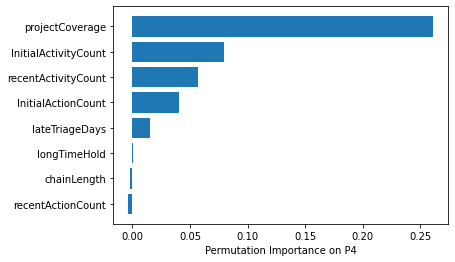

In [18]:
from matplotlib import pyplot as plt
# sorted_idx = p2_model.feature_importances_.argsort()
# plt.barh(feature_names[sorted_idx], p2_model.feature_importances_[sorted_idx])
# plt.xlabel("Xgboost buildin Feature Importance on P2")

from sklearn.inspection import permutation_importance
perm_importance = permutation_importance(p3_model, test_X_P3, test_y_P3)

sorted_idx = perm_importance.importances_mean.argsort()
plt.barh(feature_names[sorted_idx], perm_importance.importances_mean[sorted_idx])
plt.xlabel("Permutation Importance on P4")

print(perm_importance.importances_mean[sorted_idx])

In [ ]:
# # regression results
# regression_true = pd.concat([p2_regression_true, p3_regression_true])
# regression_true = pd.concat([regression_true, p4_regression_true])

# regression_pred = np.concatenate((p2_regression_pred, p3_regression_pred), axis=0)
# regression_pred = np.concatenate((regression_pred, p4_regression_pred), axis=0)

# ## classification results
# classification_true = pd.concat([p2_classification_true, p3_classification_true])
# classification_true = pd.concat([classification_true, p4_classification_true])

# classification_pred = pd.concat([p2_classification_pred, p3_classification_pred])
# classification_pred = pd.concat([classification_pred, p4_classification_pred])

In [ ]:
# print("---Dynamic Features (including Activity Sequ) results on all data 75%---")
# rmse = np.sqrt(mean_squared_error(regression_pred, regression_true))
# print("RMSE: %f" % rmse)
# mae = mean_absolute_error(regression_pred, regression_true)
# print("MAE: %f" % mae)
# print(confusion_matrix(classification_true, classification_pred))
# print(classification_report(classification_true, classification_pred))